## Behaviour if grouping and calculating the mean if NaN-values are in the group

In [1]:
import pandas as pd
import numpy as np

# Case 1: no NaN
s1 = pd.Series([1, 2, 3])
print("Case 1 mean:", s1.mean())  # 2.0

# Case 2: some NaN
s2 = pd.Series([1, np.nan, 3])
print("Case 2 mean:", s2.mean())  # 2.0 (ignores NaN)

# Case 3: all NaN
s3 = pd.Series([np.nan, np.nan])
print("Case 3 mean:", s3.mean())  # NaN


Case 1 mean: 2.0
Case 2 mean: 2.0
Case 3 mean: nan


In [ ]:
# Load merged hourly dataset
df = pd.read_csv("../../data_cleaned/merged/Merge_all_prices_load_gen_res.csv")
# Convert timestamp columns to datetime
df["period_start_utc"] = pd.to_datetime(df["period_start_utc"], utc=True, errors="coerce")
df["period_end_utc"] = pd.to_datetime(df["period_end_utc"], utc=True, errors="coerce")

# Optional: convert date column if needed
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# Basic cleaning and sorting
# df["gen_forecast_da"] = pd.to_numeric(df["gen_forecast_da"], errors="coerce")
# df["load_forecast_da"] = pd.to_numeric(df["load_forecast_da"], errors="coerce")
df = df.sort_values("period_start_utc")

df.head()

,date,year,month,day,dayofyear,hour,week,dayofweek,price,period_start_utc,...,off_wind_da,off_wind_act,on_wind_da,on_wind_act,solar_da,solar_act,gen_forecast_da,gen_actual,res_sum_da,res_sum_act
0,2015-01-04,2015,1,4,4,23,1,6,22.34,2015-01-04 23:00:00+00:00,...,192.125,478.0200,11675.5250,14223.2775,0.0,0.1700,NaN,57028.5925,11867.6500,14701.4675
1,2015-01-05,2015,1,5,5,0,2,0,17.93,2015-01-05 00:00:00+00:00,...,192.375,468.5525,11924.5575,14207.5025,0.0,0.2075,NaN,56318.8525,12116.9325,14676.2625
2,2015-01-05,2015,1,5,5,1,2,0,15.17,2015-01-05 01:00:00+00:00,...,195.000,465.5550,12000.4075,14439.8025,0.0,0.1800,NaN,56216.6000,12195.4075,14905.5375
3,2015-01-05,2015,1,5,5,2,2,0,16.38,2015-01-05 02:00:00+00:00,...,193.625,454.0175,12108.2650,14584.6825,0.0,0.2000,NaN,56394.7350,12301.8900,15038.9000
4,2015-01-05,2015,1,5,5,3,2,0,17.38,2015-01-05 03:00:00+00:00,...,187.625,457.4750,12196.1175,15071.2450,0.0,0.1950,NaN,57670.7700,12383.7425,15528.9150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96336 entries, 0 to 96335
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              96336 non-null  datetime64[ns]     
 1   year              96336 non-null  int64              
 2   month             96336 non-null  int64              
 3   day               96336 non-null  int64              
 4   dayofyear         96336 non-null  int64              
 5   hour              96336 non-null  int64              
 6   week              96336 non-null  int64              
 7   dayofweek         96336 non-null  int64              
 8   price             96336 non-null  float64            
 9   period_start_utc  96336 non-null  datetime64[ns, UTC]
 10  period_end_utc    96336 non-null  datetime64[ns, UTC]
 11  c_by_hour         96336 non-null  int64              
 12  load_forecast_da  95229 non-null  float64            
 13  l

In [6]:
group_cols = [
    "date", "year", "month", "day", "dayofyear", "week", "dayofweek"
]

df_d = (
    df
    .groupby(group_cols, as_index=False)
    .agg(
        price=("price", "mean"),
        period_start_utc=("period_start_utc", "min"),
        period_end_utc=("period_end_utc", "max"),
        c_by_day=("year", "size"),   # count rows per group
    )
)
df_d.head()

,date,year,month,day,dayofyear,week,dayofweek,price,period_start_utc,period_end_utc,c_by_day
0,2015-01-04,2015,1,4,4,1,6,22.340000,2015-01-04 23:00:00+00:00,2015-01-05 00:00:00+00:00,1
1,2015-01-05,2015,1,5,5,2,0,36.387500,2015-01-05 00:00:00+00:00,2015-01-06 00:00:00+00:00,24
2,2015-01-06,2015,1,6,6,2,1,33.730833,2015-01-06 00:00:00+00:00,2015-01-07 00:00:00+00:00,24
3,2015-01-07,2015,1,7,7,2,2,38.795000,2015-01-07 00:00:00+00:00,2015-01-08 00:00:00+00:00,24
4,2015-01-08,2015,1,8,8,2,3,28.497083,2015-01-08 00:00:00+00:00,2015-01-09 00:00:00+00:00,24


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96336 entries, 0 to 96335
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              96336 non-null  datetime64[ns]     
 1   year              96336 non-null  int64              
 2   month             96336 non-null  int64              
 3   day               96336 non-null  int64              
 4   dayofyear         96336 non-null  int64              
 5   hour              96336 non-null  int64              
 6   week              96336 non-null  int64              
 7   dayofweek         96336 non-null  int64              
 8   price             96336 non-null  float64            
 9   period_start_utc  96336 non-null  datetime64[ns, UTC]
 10  period_end_utc    96336 non-null  datetime64[ns, UTC]
 11  c_by_hour         96336 non-null  int64              
 12  load_forecast_da  95229 non-null  float64            
 13  l

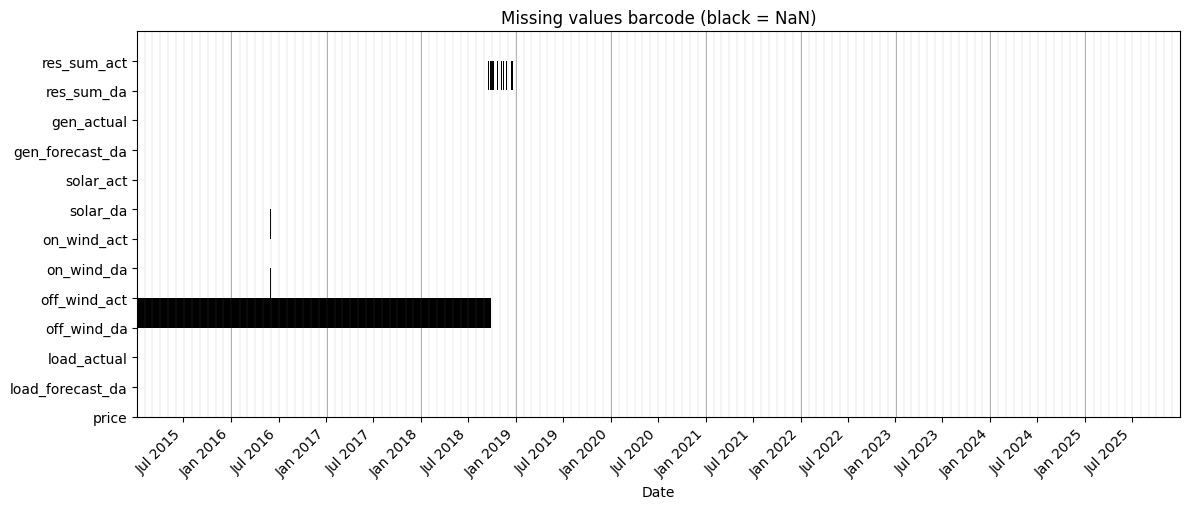

In [23]:
# Missingness "barcode" with dates on x-axis
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

float_cols = df.select_dtypes(include="float").columns.tolist()
missing = df[float_cols].isna().values  # rows x cols

# choose x-axis values
x = pd.to_datetime(df["period_start_utc"])

fig, ax = plt.subplots(figsize=(12, 0.4 * len(float_cols)))
ax.imshow(missing.T, aspect="auto", interpolation="nearest", cmap="Greys",
          extent=[mdates.date2num(x.min()), mdates.date2num(x.max()), 0, len(float_cols)])

ax.set_yticks(range(len(float_cols)))
ax.set_yticklabels(float_cols)
ax.set_xlabel("Date")
ax.set_title("Missing values barcode (black = NaN)")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")


# ax.xaxis_date()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right")'

# add month boundary lines
for dt in pd.date_range(x.min(), x.max(), freq="MS"):
    ax.axvline(mdates.date2num(dt), color="gray", linewidth=0.3, alpha=0.4)

# add year boundary lines
for dt in pd.date_range(x.min(), x.max(), freq="YS"):
    ax.axvline(mdates.date2num(dt), color="black", linewidth=0.5, alpha=0.4)




plt.tight_layout()
plt.show()


In [28]:
float_cols = df.select_dtypes(include="float").columns

nan_per_year = (
    df.groupby(df["period_start_utc"].dt.year)[float_cols]
      .apply(lambda g: g.isna().sum())
)

nan_total = df[float_cols].isna().sum().rename("ALL")

# put ALL as first column
nan_table = pd.concat([nan_total, nan_per_year.T], axis=1)

nan_table.style.apply(
    lambda _: ["font-weight: bold"] + [""] * (nan_table.shape[1] - 1),
    axis=1
)



,ALL,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
price,0,0,0,0,0,0,0,0,0,0,0,0
load_forecast_da,1107,0,0,0,1057,0,0,0,48,1,1,0
load_actual,9,0,0,0,9,0,0,0,0,0,0,0
off_wind_da,0,0,0,0,0,0,0,0,0,0,0,0
off_wind_act,0,0,0,0,0,0,0,0,0,0,0,0
on_wind_da,3,0,0,0,0,0,0,0,0,1,1,1
on_wind_act,48,0,48,0,0,0,0,0,0,0,0,0
solar_da,3,0,0,0,0,0,0,0,0,1,1,1
solar_act,48,0,48,0,0,0,0,0,0,0,0,0
gen_forecast_da,32738,8665,8784,8760,6526,0,0,0,0,1,1,1
